In [823]:
using DataFrames, CSV, CategoricalArrays
using Statistics, Clustering, LinearAlgebra
using Plots

# Student Performancing

In [768]:
filename = "./datasets/student-mat.csv"
df0 = DataFrame(CSV.File(filename))
df0[1:5,:]

5×33 DataFrame
 Row │ school   sex      age    address  famsize  Pstatus  Medu   Fedu   Mjob  ⋯
     │ String3  String1  Int64  String1  String3  String1  Int64  Int64  Strin ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ GP       F           18  U        GT3      A            4      4  at_ho ⋯
   2 │ GP       F           17  U        GT3      T            1      1  at_ho
   3 │ GP       F           15  U        LE3      T            1      1  at_ho
   4 │ GP       F           15  U        GT3      T            4      2  healt
   5 │ GP       F           16  U        GT3      T            3      3  other ⋯
                                                              25 columns omitted

In [10]:
grades = df0[[:G1, :G2, :G3]]
head(grades)

6×3 DataFrame
│ Row │ G1    │ G2    │ G3    │
│     │ Int64 │ Int64 │ Int64 │
├─────┼───────┼───────┼───────┤
│ 1   │ 5     │ 6     │ 6     │
│ 2   │ 5     │ 5     │ 6     │
│ 3   │ 7     │ 8     │ 10    │
│ 4   │ 15    │ 14    │ 15    │
│ 5   │ 6     │ 10    │ 10    │
│ 6   │ 15    │ 15    │ 15    │

#  California Housing

In [769]:
filename = "./datasets/housing.csv"
chdata = DataFrame(CSV.File(filename))
df = copy(chdata)
df[1:5,:]

5×10 DataFrame
 Row │ longitude  latitude  housing_median_age  total_rooms  total_bedrooms  p ⋯
     │ Float64    Float64   Float64             Float64      Float64?        F ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │   -122.23     37.88                41.0        880.0           129.0    ⋯
   2 │   -122.22     37.86                21.0       7099.0          1106.0
   3 │   -122.24     37.85                52.0       1467.0           190.0
   4 │   -122.25     37.85                52.0       1274.0           235.0
   5 │   -122.25     37.85                52.0       1627.0           280.0    ⋯
                                                               5 columns omitted

In [469]:
chdata

20640×10 DataFrame
   Row │ longitude  latitude  housing_median_age  total_rooms  total_bedrooms  ⋯
       │ Float64    Float64   Float64             Float64      Float64?        ⋯
───────┼────────────────────────────────────────────────────────────────────────
     1 │   -122.23     37.88                41.0        880.0           129.0  ⋯
     2 │   -122.22     37.86                21.0       7099.0          1106.0
     3 │   -122.24     37.85                52.0       1467.0           190.0
     4 │   -122.25     37.85                52.0       1274.0           235.0
     5 │   -122.25     37.85                52.0       1627.0           280.0  ⋯
     6 │   -122.25     37.85                52.0        919.0           213.0
     7 │   -122.25     37.84                52.0       2535.0           489.0
     8 │   -122.25     37.84                52.0       3104.0           687.0
     9 │   -122.26     37.84                42.0       2555.0           665.0  ⋯
    10 │   -122.25     37.84                52.0       3549.0           707.0
    11 │   -122.26     37.85                52.0       2202.0           434.0
   ⋮   │     ⋮         ⋮              ⋮                ⋮             ⋮         ⋱
 20631 │   -121.32     39.29                11.0       2640.0           505.0
 20632 │   -121.4      39.33                15.0       2655.0           493.0  ⋯
 20633 │   -121.45     39.26                15.0       2319.0           416.0
 20634 │   -121.53     39.19                27.0       2080.0           412.0
 20635 │   -121.56     39.27                28.0       2332.0           395.0
 20636 │   -121.09     39.48                25.0       1665.0           374.0  ⋯
 20637 │   -121.21     39.49                18.0        697.0           150.0
 20638 │   -121.22     39.43                17.0       2254.0           485.0
 20639 │   -121.32     39.43                18.0       1860.0           409.0
 20640 │   -121.24     39.37                16.0       2785.0           616.0  ⋯
                                                5 columns and 20619 rows omitted

In [468]:
dropmissing!(df)

20433×10 DataFrame
   Row │ longitude  latitude  housing_median_age  total_rooms  total_bedrooms  ⋯
       │ Float64    Float64   Float64             Float64      Float64         ⋯
───────┼────────────────────────────────────────────────────────────────────────
     1 │   -122.23     37.88                41.0        880.0           129.0  ⋯
     2 │   -122.22     37.86                21.0       7099.0          1106.0
     3 │   -122.24     37.85                52.0       1467.0           190.0
     4 │   -122.25     37.85                52.0       1274.0           235.0
     5 │   -122.25     37.85                52.0       1627.0           280.0  ⋯
     6 │   -122.25     37.85                52.0        919.0           213.0
     7 │   -122.25     37.84                52.0       2535.0           489.0
     8 │   -122.25     37.84                52.0       3104.0           687.0
     9 │   -122.26     37.84                42.0       2555.0           665.0  ⋯
    10 │   -122.25     37.84                52.0       3549.0           707.0
    11 │   -122.26     37.85                52.0       2202.0           434.0
   ⋮   │     ⋮         ⋮              ⋮                ⋮             ⋮         ⋱
 20424 │   -121.32     39.29                11.0       2640.0           505.0
 20425 │   -121.4      39.33                15.0       2655.0           493.0  ⋯
 20426 │   -121.45     39.26                15.0       2319.0           416.0
 20427 │   -121.53     39.19                27.0       2080.0           412.0
 20428 │   -121.56     39.27                28.0       2332.0           395.0
 20429 │   -121.09     39.48                25.0       1665.0           374.0  ⋯
 20430 │   -121.21     39.49                18.0        697.0           150.0
 20431 │   -121.22     39.43                17.0       2254.0           485.0
 20432 │   -121.32     39.43                18.0       1860.0           409.0
 20433 │   -121.24     39.37                16.0       2785.0           616.0  ⋯
                                                5 columns and 20412 rows omitted

In [89]:
ndf = names(df)

10-element Vector{String}:
 "longitude"
 "latitude"
 "housing_median_age"
 "total_rooms"
 "total_bedrooms"
 "population"
 "households"
 "median_income"
 "median_house_value"
 "ocean_proximity"

# Data Preprocess


In [60]:
pos = df[!, ndf[1:2]]
pos = Array(pos)
km_pos = kmeans(pos |> transpose, 2)
df[!, "pos"] = km_pos.assignments
km_pos.centers

2×2 Matrix{Float64}:
 -118.007   -121.717
   33.9409    37.9569

In [61]:
scatter(pos[:,1], pos[:,2])
scatter!(km_pos.centers[1,:], km_pos.centers[2,:])

In [573]:
dfop = CategoricalArray(df[!, "ocean_proximity"])
levels!(dfop, ["<1H OCEAN", "INLAND", "NEAR BAY", "NEAR OCEAN", "ISLAND"])
dfop |> levels

In [575]:
df[!, :lv_op] = levelcode.(dfop)
ndf = names(df)

12-element Vector{String}:
 "longitude"
 "latitude"
 "housing_median_age"
 "total_rooms"
 "total_bedrooms"
 "population"
 "households"
 "median_income"
 "median_house_value"
 "ocean_proximity"
 "pos"
 "lv_op"

In [576]:
df= df[df[!, :lv_op] .!= 5, :]

20428×12 DataFrame
   Row │ longitude  latitude  housing_median_age  total_rooms  total_bedrooms  ⋯
       │ Float64    Float64   Float64             Float64      Float64         ⋯
───────┼────────────────────────────────────────────────────────────────────────
     1 │   -122.23     37.88                41.0        880.0           129.0  ⋯
     2 │   -122.22     37.86                21.0       7099.0          1106.0
     3 │   -122.24     37.85                52.0       1467.0           190.0
     4 │   -122.25     37.85                52.0       1274.0           235.0
     5 │   -122.25     37.85                52.0       1627.0           280.0  ⋯
     6 │   -122.25     37.85                52.0        919.0           213.0
     7 │   -122.25     37.84                52.0       2535.0           489.0
     8 │   -122.25     37.84                52.0       3104.0           687.0
     9 │   -122.26     37.84                42.0       2555.0           665.0  ⋯
    10 │   -122.25     37.84                52.0       3549.0           707.0
    11 │   -122.26     37.85                52.0       2202.0           434.0
   ⋮   │     ⋮         ⋮              ⋮                ⋮             ⋮         ⋱
 20419 │   -121.32     39.29                11.0       2640.0           505.0
 20420 │   -121.4      39.33                15.0       2655.0           493.0  ⋯
 20421 │   -121.45     39.26                15.0       2319.0           416.0
 20422 │   -121.53     39.19                27.0       2080.0           412.0
 20423 │   -121.56     39.27                28.0       2332.0           395.0
 20424 │   -121.09     39.48                25.0       1665.0           374.0  ⋯
 20425 │   -121.21     39.49                18.0        697.0           150.0
 20426 │   -121.22     39.43                17.0       2254.0           485.0
 20427 │   -121.32     39.43                18.0       1860.0           409.0
 20428 │   -121.24     39.37                16.0       2785.0           616.0  ⋯
                                                7 columns and 20407 rows omitted

In [741]:
name_of_y = :median_house_value
names_of_x = Symbol.(ndf[3:8])
names_of_z = Symbol.(ndf[11 : end])
dfy = df[!, name_of_y]
dfX = df[!, names_of_x]
dfZ = df[!, names_of_z]
dfZ[1:5,:]

5×2 DataFrame
 Row │ pos    lv_op 
     │ Int64  Int64 
─────┼──────────────
   1 │     2      3
   2 │     2      3
   3 │     2      3
   4 │     2      3
   5 │     2      3

In [131]:
sample = [dfX dfZ]
sample[:y] = df[:, name_of_y]
names(sample)

11-element Vector{String}:
 "longitude"
 "latitude"
 "housing_median_age"
 "total_rooms"
 "total_bedrooms"
 "population"
 "households"
 "median_income"
 "lv_op"
 "pos"
 "y"

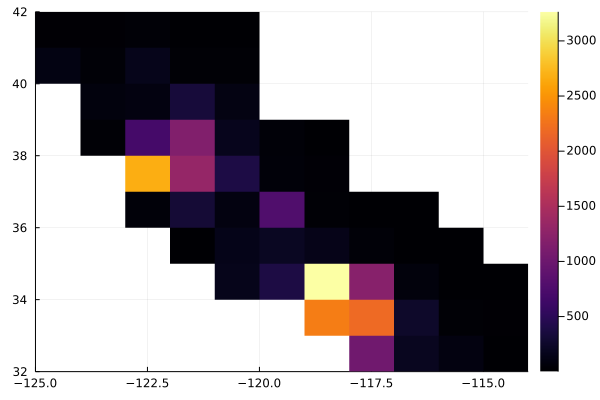

In [132]:
histogram2d(X[:,1], X[:,2])

In [133]:
mx = mean(X, dims = 1)

sx = std(X, dims = 1)

up_x = mx .+  3 * sx

ind = Bool.(ones(n))
for k in 1:n
ind[k] =  X[k, 4:7] < up_x[4:7]
end

In [134]:
sum(ind)

20057

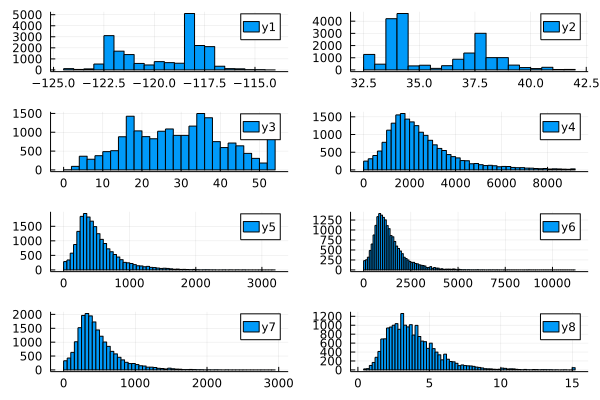

In [135]:
# X = scaler(X, 2)
X_ = X[ind, :]
figx = plot(layout = (4,2))
for k in 1:8
    pk = figx.subplots[k]
    histogram!(pk, X_[:, k])
end
    figx
    

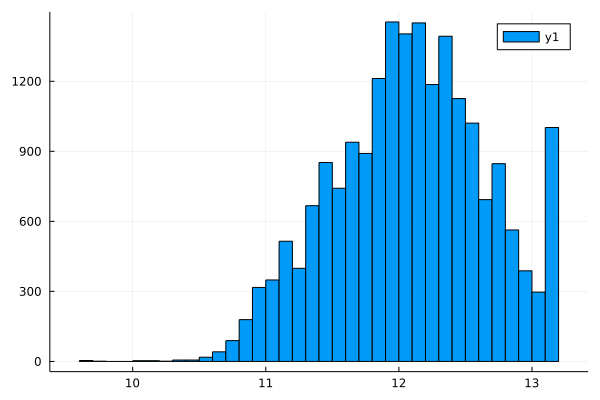

In [136]:
histogram(y[ind])

# GLM fitting

In [744]:
using GLM, QuantReg

┌ Info: Precompiling QuantReg [a0becc08-653f-40d2-91e7-721373d1053f]
└ @ Base loading.jl:1342
┌ Warning: Module DataFrames with build ID 1366377198511 is missing from the cache.
│ This may mean DataFrames [a93c6f00-e57d-5684-b7b6-d8193f3e46c0] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1030
┌ Info: Skipping precompilation since __precompile__(false). Importing QuantReg [a0becc08-653f-40d2-91e7-721373d1053f].
└ @ Base loading.jl:1047
┌ Info: Precompiling JuMP [4076af6c-e467-56ae-b986-b466b2749572]
└ @ Base loading.jl:1342
┌ Warning: Module ForwardDiff with build ID 1367428348610 is missing from the cache.
│ This may mean ForwardDiff [f6369f11-7733-5829-9624-2563aa707210] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1030
┌ Info: Skipping precompilation since __precompile__(false). Importing JuMP [4076af6c-e467-56ae-b986-b466b2749572].
└ @ Base loading.jl:1047


In [745]:
formula = Term(name_of_y) ~ sum([Term(x) for x in names_of_x])

FormulaTerm
Response:
  median_house_value(unknown)
Predictors:
  housing_median_age(unknown)
  total_rooms(unknown)
  total_bedrooms(unknown)
  population(unknown)
  households(unknown)
  median_income(unknown)

In [101]:
model = lm(formula, df[1:2000,:])

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

median_house_value ~ 1 + housing_median_age + total_rooms + total_bedrooms + population + households + median_income

Coefficients:
─────────────────────────────────────────────────────────────────────────────────────────
                           Coef.  Std. Error      t  Pr(>|t|)     Lower 95%     Upper 95%
─────────────────────────────────────────────────────────────────────────────────────────
(Intercept)         -24763.6      5721.25     -4.33    <1e-04  -35983.9      -13543.4
housing_median_age    1206.56       98.1291   12.30    <1e-32    1014.11       1399.01
total_rooms              0.56757     2.35607   0.24    0.8097      -4.05305       5.18819
total_bedrooms          13.1151     22.4963    0.58    0.5600     -31.0037       57.2339
population             -35.7155      4.34982  -8.21    <1e-15     -4

# QGPLSIM fitting

In [637]:
include("supportFunctions.ji")
include("qgplsim.ji")
include("get_califdata.ji")

califdata (generic function with 2 methods)

In [724]:

Xa, Za, ya = califdata(3.0) # a for all

size(Xa)

(20057, 6)

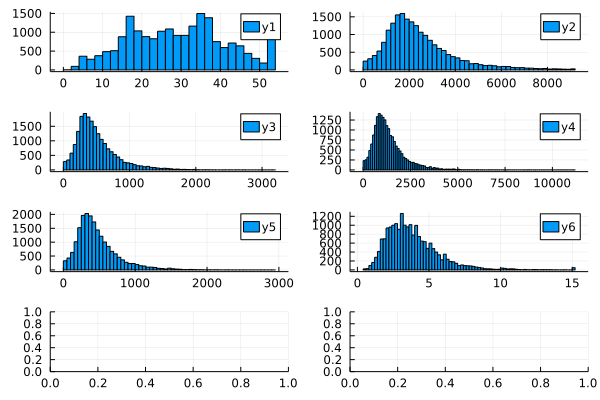

In [726]:
# X = scaler(X, 2)
figx = plot(layout = (4,2))
for k in 1:6
    pk = figx.subplots[k]
    histogram!(pk, Xa[:, k])
end
    figx

In [ ]:
nmc = 20
mse = zeros(nmc)
t = 1
X = scaler(Xa, 1)
y = log.(ya)
Z = Za .- 1.0
Z[:, 2] = Z[:, 2] ./ maximum(Z[:, 2])
Z[:, 1] = Z[:, 1] ./ maximum(Z[:, 1])

ntrain = 2000
ntest = 2000

n, = size(y)
@threads for t in 1:nmc

    indn = Array(1:n)
    indr = rand(indn, ntrain)
    indt = [x in indr for x in indn]
    indt = Bool.(1 .- indt)
    indt = rand(indn[indt], ntest)

    Xr = X[indr, :]
    yr = y[indr] 
    Zr = Z[indr, :]

    Xt = X[indt, :]
    yt = y[indt]  
    Zt = Z[indt, :]
    tau = 0.5
    # categ, index = collection(Z)
    # for zk in categ
    #  println(zk, " ", length(index[zk]))
    # end
    # train_data = [Xr Zr yr]
    # histogram(train_data[:,6])
    # var(train_data, dims = 1)[1:6]

    width_exp = -0.04
    qsmodel = qgplsim.model(Xr, Zr, yr, tau, width_exp)
    # for zk in qsmodel.categ
    #  println(zk, " ", length(qsmodel.index[zk]))
    # end

    # qsmodel1 = qgplsim.model(Xr, Zr, yr, 0.1)
    # qsmodel9 = qgplsim.model(Xr, Zr, yr, 0.9)
    # @time qgplsim.estimator(qsmodel1)
    # @time qgplsim.estimator(qsmodel9)

    @time qgplsim.estimator(qsmodel)

    vv = Xt * qsmodel.alpha
    yl = Xt * qsmodel.theta
    yp = qgplsim.predict(qsmodel, Xt, Zt) + yl
    ## yp .= (abs.(yp) .> 1e2) .* 0 + (abs.(yp) .<= 1e2) .* yp
    bias = yt - yp
    mse[t] = sum(bias.^2) / ntest
end

 62.519542 seconds (237.11 M allocations: 360.486 GiB, 33.49% gc time)
 83.542929 seconds (303.84 M allocations: 428.874 GiB, 36.16% gc time)
 98.116548 seconds (341.69 M allocations: 466.153 GiB, 36.46% gc time)
 99.240619 seconds (346.38 M allocations: 471.223 GiB, 36.55% gc time)
 60.737786 seconds (222.39 M allocations: 339.929 GiB, 26.70% gc time)
 70.482503 seconds (249.70 M allocations: 390.263 GiB, 26.92% gc time)
 85.540309 seconds (282.43 M allocations: 440.559 GiB, 28.05% gc time)
 81.750680 seconds (239.80 M allocations: 398.641 GiB, 28.39% gc time)

In [739]:
mse[1]

0.2437497360378947

In [742]:
mean(mse)

0.2737346794403453

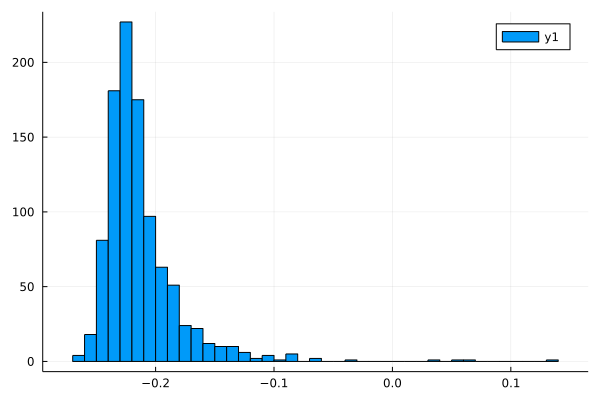

In [743]:
histogram(vv)

In [744]:
using Plots
scatter(vv, yt)
scatter!(vv, yp, color = "red")
scatter!(vv, yp - yl)
scatter!(vv, yl)


LoadError: DimensionMismatch("dimensions must match: a has dims (Base.OneTo(1000), Base.OneTo(1)), b has dims (Base.OneTo(2000), Base.OneTo(1)), mismatch at 1")

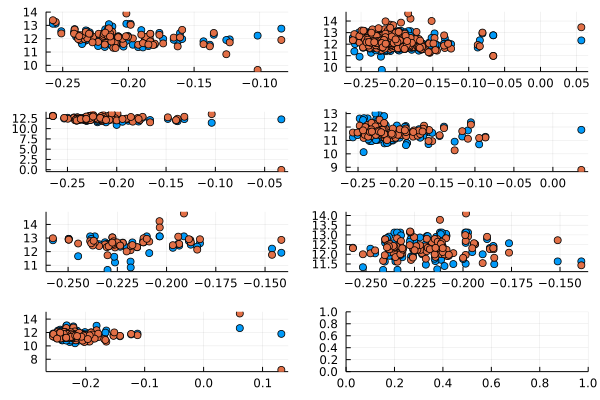

In [736]:
fig = plot(layouts = (4,2))
categ, index = collection(Zt)
for k in 1:7
    pk = fig.subplots[k]
    zk = categ[k]
    indk = index[zk]
    vk = vv[indk]
    ypk = yp[indk]
    # yp1k = yp1[indk]
    # yp9k = yp9[indk]
    ytk = yt[indk]
    scatter!(pk, vk, ytk, label = false)
    scatter!(pk, vk, ypk, label = false)
    # scatter!(pk, vk, yp1k, label = false)
    # scatter!(pk, vk, yp9k, label = false)
end
fig

0.01842050325642648
0.022727033758719165
0.01833989050777085
0.03524735059741962
0.02070814464043404
0.02158716302026482
0.02298516614040839
[0.07754067145313785, -0.08480572394882813]
[-0.23230533366900974, -0.15428127761294588]


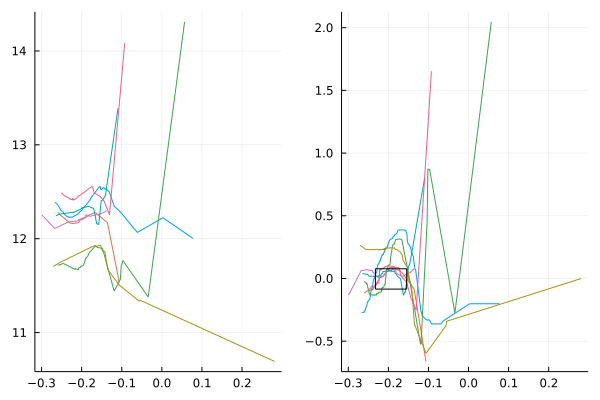

In [737]:
g = zeros(n)
dg = zeros(n)
yl = Xr * qsmodel.theta
yz = yr - yl
τ = tau
v = Xr * qsmodel.alpha
categ, index = collection(Zr)
z = collect(index)
ncateg = index.count
width = zeros(ncateg)
v0 = -1e6
v1 = 1e6

# max_v = maximum(v)
# min_v = minimum(v)
# widv =   max_v - min_v    
# v = ((v .- min_v) / widv .- 0.5) * 4

for k in 1:ncateg
    vk = v[z[k][2]]
    h = (length(vk))^(width_exp) * std(vk)   
    println(h)
    width[k] = h 

    dgk(u) = qgplsim.Gz(u, vk, yz[z[k][2]], 1, τ, width_exp)
    gk(u) = qgplsim.Gz(u, vk, yz[z[k][2]], 0, τ, width_exp)

    dg[z[k][2]] = dgk(vk)
    g[z[k][2]] = gk(vk)

    vkmin = minimum(vk) # + h
    vkmax = maximum(vk) # - h

    if  vkmin > v0
        v0 = vkmin
    end
    if  vkmax < v1
        v1 = vkmax
    end  
end

mh = minimum(width)
v0 = v0 + mh
v1 = v1 - mh


v_ = v[v .> v1]
_v = v[v .< v0]

v_ = minimum(v_)
_v = maximum(_v)
# _v, v_

C0 = zeros(ncateg)
C1 = zeros(ncateg)
dgf(vv, k) = qgplsim.Gz(vv, v[z[k][2]], yz[z[k][2]], 1, τ)


p1 = plot()
p2 = plot()
for m in 1:ncateg
    C0[m] = dgf(_v, m)[1]
    C1[m] = dgf(v_, m)[1]

    vm = v[index[categ[m]]]
    dgm = dg[index[categ[m]]]
    gm = g[index[categ[m]]]
    indm = sortperm(vm)
    sorted_dgm = dgm[indm]
    sorted_gm = gm[indm]
    sorted_vm = vm[indm]
    plot!(p1, sorted_vm, sorted_gm, label = false ) # L"g_{%$m} (v)")
    plot!(p2, sorted_vm, sorted_dgm, label = false ) # L"\nabla g_{%$m} (v)")

end

c0 = maximum(C0)
C1 = C1[C1 .> C0]
c1 = minimum(C1)
println("[$c0, $c1]")
println("[$v0, $v1]")

plot!(p2, [v0, v0], [c0, c1], color = "black", label = false)
plot!(p2, [v1, v1], [c0, c1], color = "black", label = false)
plot!(p2, [v0, v1], [c0, c0], color = "black", label = false)
plot!(p2, [v0, v1], [c1, c1], color = "black", label = false)


plot(p1, p2, layout = (1,2))

In [507]:
std(v)

0.031484101516898635

In [610]:
using Base.Threads
nbs = 12 # n bootstrap
pred_bias = zeros(nbs)
indn = Array(1:n)    
tau = 0.5
y = log.(y)
@threads for k in 1:nbs

    indr = rand(indn, ntrain)
    indt = [x in indr for x in indn]
    indt = Bool.(1 .- indt)
    indt = indn[indt]

    Xr = X[indr, :]
    yr = y[indr] / 1e3  # 1000 dollors per
    Zr = Z[indr, :]
    Xr = scale3(Xr)

    Xt = X[indt, :]
    yt = y[indt] / 1e3  # 1000 dollors per
    Zt = Z[indt, :]
    Xt = scale3(Xt)

    qsmodel = qgplsim.model(Xr, Zr, yr, tau)
    qgplsim.estimator(qsmodel)
    v1 = Xt * qsmodel.alpha
    yp = qgplsim.predict(qsmodel, Xt, Zt)
    # yp1 = qgplsim.predict(qsmodel1, Xt, Zt)
    # yp9 = qgplsim.predict(qsmodel9, Xt, Zt)
    bias = (yp - yt)
    mbias = ((bias).^2 |> sum) / ntest
   pred_bias[k] = mbias 
end

LoadError: UndefVarError: k not defined

In [498]:
pred_bias

100-element Vector{Float64}:
 0.0173310613425616
 0.017555085108896668
 0.019402509715633176
 0.01931246005863289
 0.01762916495091136
 0.019771678989273612
 0.019538969214167912
 0.018489505430656358
 0.018127565691278536
 0.019428214388030225
 0.016399116529883677
 0.021344582799324812
 0.01903272534357514
 ⋮
 0.01746116463084532
 0.019359394254861193
 0.0189913427106428
 0.018897301531064913
 0.01880215236710543
 0.018576828480379563
 0.02107120293353489
 0.01763984587710136
 0.017742166446224478
 0.018102881968041367
 0.018531829335304045
 0.02029935036860918